In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
x1 = np.linspace(-5,5,26)
y1 = np.linspace(-5,5,26)

In [3]:
X,Y = np.meshgrid(x1,y1)

In [4]:
eps = 8.8542e-12
k_0 = 1/(4*np.pi*eps)

In [5]:
def getField(X,Y,q,qloc_x,qloc_y,k_0):
    X_new = X - qloc_x
    Y_new = Y - qloc_y
    r = ((X_new**2)+(Y_new**2))
    angle = np.angle(X_new + Y_new*1j)
    Ex = (k_0*(q/r))*np.cos(angle)
    Ey = (k_0*(q/r))*np.sin(angle)
    return Ex, Ey

In [6]:
q1loc_x_i = -2
q1loc_x_f = 2
pasos = (q1loc_x_f - q1loc_x_i)*20

q1loc_x_range = np.linspace (q1loc_x_i,q1loc_x_f,pasos)
q1loc_y = 3
q = 20e-6

In [7]:
q2loc_y_i = -4
q2loc_y_f = -1
pasos2 = (q2loc_y_f - q2loc_y_i)*100

q2loc_y_range = np.linspace (q2loc_y_i,q2loc_y_f,pasos2)
q2loc_x = 0
q2 = -20e-6

In [8]:
q3_loc = [0,0.75]
q3= 50e-6

q4_loc = [0,1.25]
q4= -50e-6

X3_new = X-q3_loc[0]
Y3_new = Y-q3_loc[1]
X4_new = X-q4_loc[0]
Y4_new = Y-q4_loc[1]

r3 = ((X3_new**2)+(Y3_new**2))
r4 = ((X4_new**2)+(Y4_new**2))

angles3 = np.angle(X3_new+Y3_new*1j)
angles4 = np.angle(X4_new+Y4_new*1j)

E3x = k_0*(q3/(r3))*(np.cos(angles3))
E3y = k_0*(q3/(r3))*(np.sin(angles3))

E4x = k_0*(q4/(r4))*(np.cos(angles4))
E4y = k_0*(q4/(r4))*(np.sin(angles4))

In [9]:
Ex = []
Ey = []
for i in range(26):
    Ex.append([0]*26)
    Ey.append([0]*26)

In [10]:
for i,q1loc_x in enumerate(q1loc_x_range):
    this_Ex, this_Ey = getField(X,Y,q,q1loc_x,q1loc_y,k_0)
    Ex = Ex + this_Ex
    Ey = Ey + this_Ey

In [11]:
for i,q2loc_y in enumerate(q2loc_y_range):
    this_Ex, this_Ey = getField(X,Y,q2,q2loc_x,q2loc_y,k_0)
    Ex = Ex + this_Ex
    Ey = Ey + this_Ey

In [12]:
Ex = Ex + E3x + E4x
Ey = Ey + E3y + E4y

In [13]:
mag = np.sqrt((Ex**2)+(Ey**2))
Ex_u = (Ex/mag)
Ey_u = (Ey/mag)

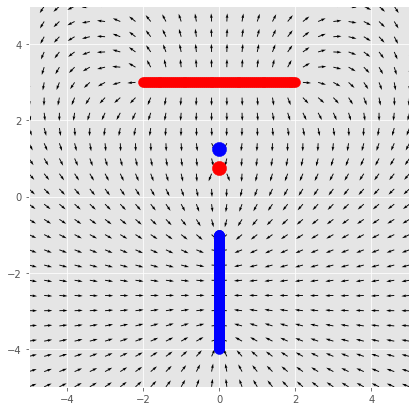

In [14]:
fig, ax = plt.subplots(figsize = (7,7))   
ax.quiver(X,Y,Ex_u,Ey_u)
ax.axis([-5,5,-5,5])
ax.set_aspect('equal','box')
ax.scatter(q3_loc[0],q3_loc[1],c='red',s=200)
ax.scatter(q4_loc[0],q4_loc[1],c='blue',s=200)
for i, q1loc_x in enumerate(q1loc_x_range):
    ax.scatter(q1loc_x,q1loc_y,c='red',s=100)
for i, q2loc_y in enumerate(q2loc_y_range):
    ax.scatter(q2loc_x,q2loc_y,c='blue',s=100)

plt.show()